# Ojas Sharma, 199303224
# Dataset chosen: Loan Prediction

In [1]:
# importing neccessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importing dataset
df = pd.read_csv("Training.csv") 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df = df.drop('Loan_ID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## Data Visualization


[Text(0.5, 1.0, 'Loan Amount based on Gender classified by Marital Status')]

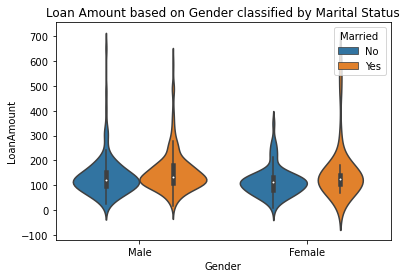

In [4]:
# 1. Loan Amount based on Gender classified by Marital Status
sns.violinplot(data=df, x="Gender", y="LoanAmount", hue='Married').set(title='Loan Amount based on Gender classified by Marital Status')

[Text(0.5, 1.0, 'Loan Amount based on Gender classified by Number of Dependents')]

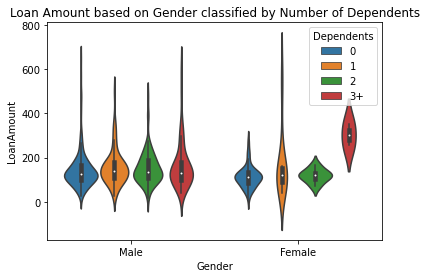

In [5]:
#2. Loan Amount based on Gender classified by Number of Dependents
sns.violinplot(data=df, x="Gender", y="LoanAmount", hue='Dependents').set(title='Loan Amount based on Gender classified by Number of Dependents')

[Text(0.5, 1.0, 'Loan Amount v Property Type classified by Gender')]

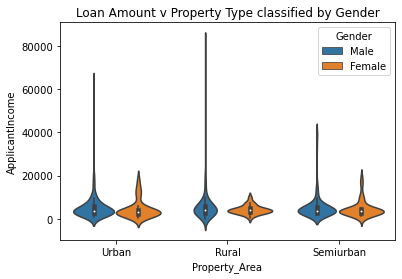

In [6]:
# 3. Loan Amount v Propert Type based on Gender
sns.violinplot(data=df, x="Property_Area", y="ApplicantIncome", hue='Gender').set(title='Loan Amount v Property Type classified by Gender')

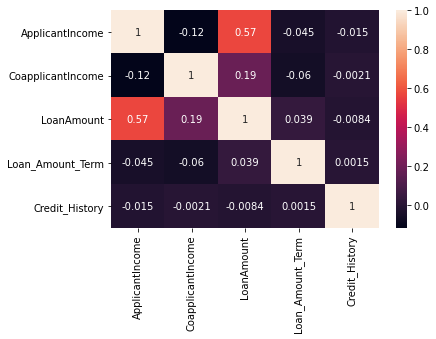

In [7]:
# Corelation Heatmap
dataplot = sns.heatmap(df.corr(), annot=True)

In [8]:
df.Gender = df.Gender.fillna(df.Gender.mode())
df.Married = df.Married.fillna(df.Married.mode())
df.Dependents = df.Dependents.fillna(df.Dependents.mode())
df.Self_Employed = df.Self_Employed.fillna(df.Self_Employed.mode())
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())
df.Credit_History = df.Credit_History.fillna(df.Credit_History.mean())

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


df['Education']= encoder.fit_transform(df['Education'])
df['Gender']= encoder.fit_transform(df['Gender'])
df['Married']= encoder.fit_transform(df['Married'])
df['Self_Employed']= encoder.fit_transform(df['Self_Employed'])
df['Property_Area']= encoder.fit_transform(df['Property_Area'])
df['Dependents']= encoder.fit_transform(df['Dependents'])
df['Credit_History']= encoder.fit_transform(df['Credit_History'])
df['Loan_Status']= encoder.fit_transform(df['Loan_Status'])

print(df.isnull().sum())
print(df.info())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 no

In [10]:
from sklearn.model_selection import train_test_split

X=df.drop('Loan_Status', axis=1)
y=df['Loan_Status']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20, random_state=102)

# Model 1: Supoort Vector Machine

In [11]:
from sklearn.svm import SVC
model1 = SVC()
model1 = model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

Accuracy of the SVC model is = 0.7073170731707317


**********************************************************


Confusion Matrix


**********************************************************


Classification report


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.71      1.00      0.83        87

    accuracy                           0.71       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.50      0.71      0.59       123



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


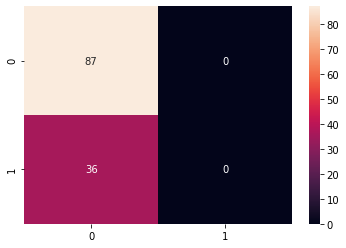

In [12]:
#Metrics for model 1
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy of the SVC model is =", model1.score(X_test, y_test))
print("\n")
print("**********************************************************")
print("\n")
print("Confusion Matrix")
cm=np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
sns.heatmap(cm, annot=True)
print("\n")
print("**********************************************************")
print("\n")
print("Classification report")
print("\n")
print(classification_report(y_test, y_pred))

# Model 2: Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

model2=DecisionTreeClassifier(random_state=100)
model2=model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)

Accuracy of the Decision Tree model is = 0.6991869918699187


**********************************************************


Confusion Matrix


**********************************************************


Classification report


              precision    recall  f1-score   support

           0       0.49      0.56      0.52        36
           1       0.80      0.76      0.78        87

    accuracy                           0.70       123
   macro avg       0.65      0.66      0.65       123
weighted avg       0.71      0.70      0.70       123



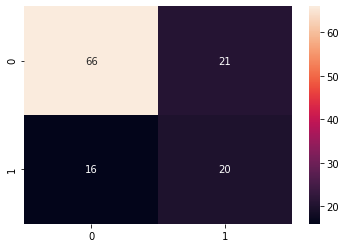

In [14]:
#Metrics for model 2
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy of the Decision Tree model is =", model2.score(X_test, y_test))
print("\n")
print("**********************************************************")
print("\n")
print("Confusion Matrix")
cm=np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
sns.heatmap(cm, annot=True)
print("\n")
print("**********************************************************")
print("\n")
print("Classification report")
print("\n")
print(classification_report(y_test, y_pred))

# Model 3: Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(random_state=1024, max_iter=100000)
model3 = model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)

Accuracy of the Logistic Regression model is = 0.8292682926829268


**********************************************************


Confusion Matrix


**********************************************************


Classification report


              precision    recall  f1-score   support

           0       0.83      0.53      0.64        36
           1       0.83      0.95      0.89        87

    accuracy                           0.83       123
   macro avg       0.83      0.74      0.77       123
weighted avg       0.83      0.83      0.82       123



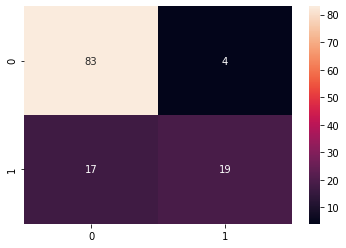

In [16]:
#Metrics for model 3
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy of the Logistic Regression model is =", model3.score(X_test, y_test))
print("\n")
print("**********************************************************")
print("\n")
print("Confusion Matrix")
cm=np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
sns.heatmap(cm, annot=True)
print("\n")
print("**********************************************************")
print("\n")
print("Classification report")
print("\n")
print(classification_report(y_test, y_pred))

# Model 4: KNN (K Nearest Neighbour)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=10)
model4 = model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)

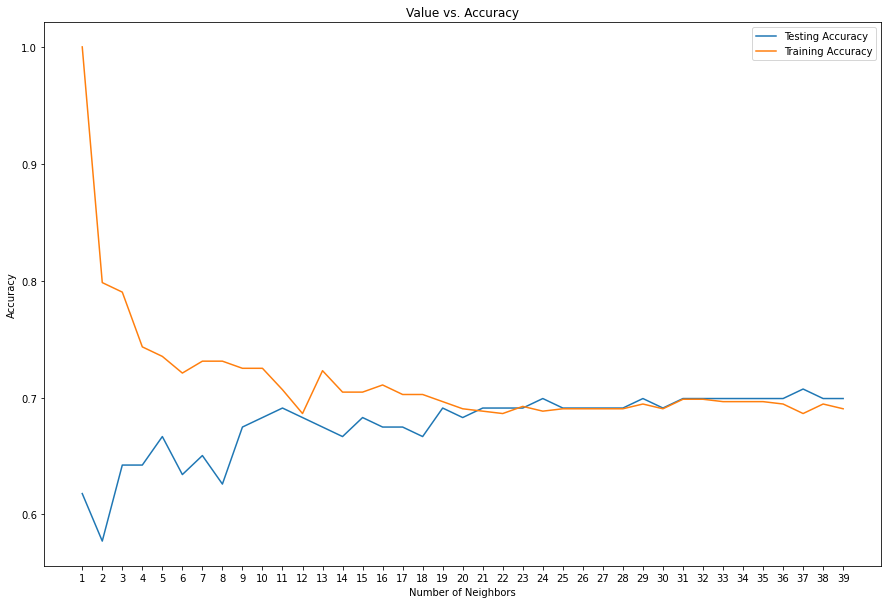

Best Accuracy is 0.7073170731707317 with K = 37


In [18]:
# Finding and optimum value of K 
from sklearn.neighbors import KNeighborsClassifier

neig = np.arange(1,40)
training_accuracy=[]
test_accuracy = []
for i, k in enumerate (neig):
    knn = KNeighborsClassifier(n_neighbors = k,n_jobs=-1)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

#Plotting the graph between the Training and Testing Accuracy
plt.figure(figsize=(15,10))
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, training_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value vs. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

#Choosing the Optimum value for our model
model4 = KNeighborsClassifier(n_neighbors=37)
model4 = model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)

Accuracy of the KNN with K=7 model is = 0.7073170731707317


**********************************************************


Confusion Matrix


**********************************************************


Classification report


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.71      1.00      0.83        87

    accuracy                           0.71       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.50      0.71      0.59       123



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


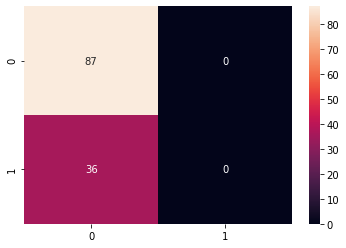

In [21]:
#Metrics for model 4
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy of the KNN with K=7 model is =", model4.score(X_test, y_test))
print("\n")
print("**********************************************************")
print("\n")
print("Confusion Matrix")
cm=np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
sns.heatmap(cm, annot=True)
print("\n")
print("**********************************************************")
print("\n")
print("Classification report")
print("\n")
print(classification_report(y_test, y_pred))

Text(0.5, 1.0, 'Models Accuracy Comparison')

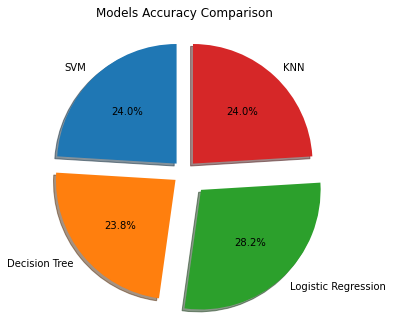

In [44]:
x = [0.7073170731707317,0.6991869918699187,0.8292682926829268,0.7073170731707317] 
fig = plt.figure(figsize = (5.5,5.5))
explode = (0.1, 0.1, 0.2, 0.1)
plt.pie(x, labels = ("SVM", "Decision Tree", "Logistic Regression", "KNN"),autopct='%1.1f%%', explode=explode, shadow=True,
       startangle=90)
plt.title("Models Accuracy Comparison")

## Results: So from the Pie-Chart we can conclude that Logistic    Regression model has the highest accuracy.